In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 200,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.01311301,  0.13354006,  0.24452324,  0.34930223,  0.45246619,
        0.55727184,  0.66386026,  0.76783603,  0.86038578,  0.93154269,
        0.97527504,  0.9918974 ,  0.98608649,  0.96348995,  0.92867464,
        0.88461602,  0.83291483,  0.77415717,  0.7082116 ,  0.63443953,
        0.55186272,  0.45934409,  0.35585111,  0.24085523,  0.11487728,
       -0.01994736, -0.15959351, -0.29853466, -0.43085867, -0.55159652,
       -0.65752041, -0.74712729, -0.82014614, -0.87702906, -0.91862017,
       -0.94595569, -0.96010995, -0.9620524 , -0.95252335, -0.93193537,
       -0.90030307, -0.85719675, -0.80173373, -0.73264486, -0.64850599,
       -0.54828018, -0.43230787, -0.30358937, -0.16845392, -0.03514604,
        0.08976635,  0.20437618,  0.31121379,  0.41476923,  0.51898217,
        0.62530464,  0.73108029,  0.8288964 ,  0.90865403,  0.96243602,
        0.98833936,  0.98988253,  0.97268844,  0.94182438,  0.90082508,
        0.85173845,  0.79547292,  0.73212498,  0.66121674,  0.58

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.13497651e-01],
       [  2.00000000e+01,   4.71058875e-01],
       [  3.00000000e+01,   3.43772322e-01],
       [  4.00000000e+01,   2.35591590e-01],
       [  5.00000000e+01,   1.62747189e-01],
       [  6.00000000e+01,   1.04189508e-01],
       [  7.00000000e+01,   8.41336846e-02],
       [  8.00000000e+01,   7.13223368e-02],
       [  9.00000000e+01,   6.05947003e-02],
       [  1.00000000e+02,   6.07711561e-02],
       [  1.10000000e+02,   5.09449244e-02],
       [  1.20000000e+02,   4.76497449e-02],
       [  1.30000000e+02,   4.23866361e-02],
       [  1.40000000e+02,   3.79525200e-02],
       [  1.50000000e+02,   3.52244414e-02],
       [  1.60000000e+02,   3.52246128e-02],
       [  1.70000000e+02,   3.16811837e-02],
       [  1.80000000e+02,   2.95859519e-02],
       [  1.90000000e+02,   2.78269816e-02],
       [  2.00000000e+02,   2.51248833e-02],
       [  2.10000000e+02,   2.12513786e-02],
       [  2.20000000e+02,   2.32319403e-02],
       [  

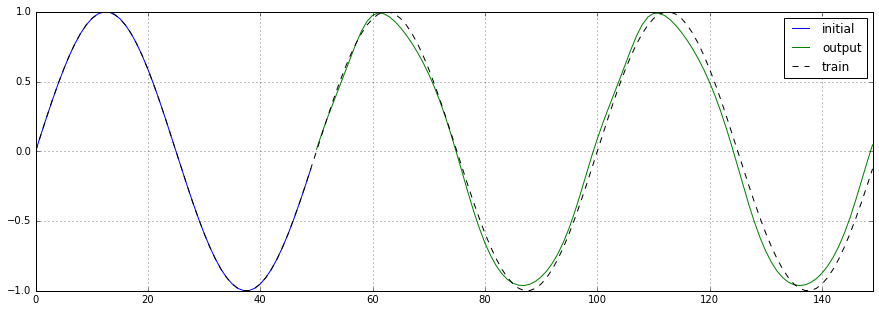

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

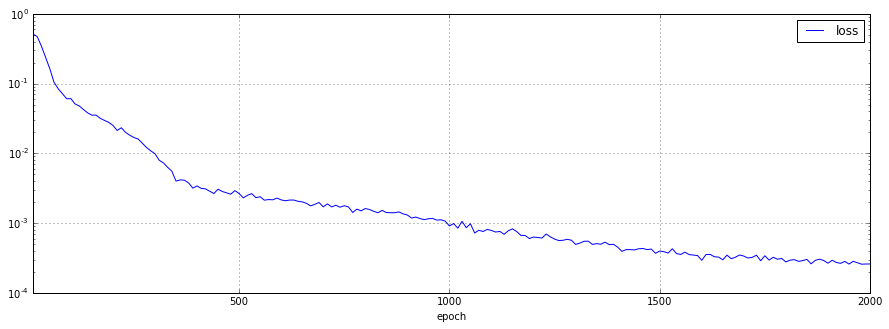

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")